- 그레이디언트 부스팅은 랜덤 포레스트의 알고리즘이 가진 여러 결점에 대한 우아한 대안이며 예측 분석 도구 상자 안에 있는 강력한 기술이다.
- 그레이디언트 부스팅 중에서 매우 유연하고 성공적으로 구현된 XGBoost에 특히 더 초점을 맞추었다. 
- xgboost는 이미 산업계와 하계 모두에서 중요한 위치를 차지하고 있을 뿐만 아니라, 수치형과 범주형 특성을 포함한 구조적인 데이터를 기반으로 하는 데이터 분석 대회에서 꾸준히 최고 성능의 알고리즘으로 선정되고 있다.

- xgboost는 빠르고 효율적으로 수십억 개의 데이터 포인트에 적용하기 위한 그레이디언트 부스팅 프레임워크이다.
- 결정 트리를 다루고 머신러닝 관점에서 배깅을 분석하며 xgboost까지 확장되는 하이퍼파라미터를 배우겠다.


In [1]:
import xgboost

# 머신러닝을 위한 데이터 준비
- **이를 데이터 랭글링**이라고 한다. 
- 머신러닝 모델을 만드는 것 외에도 효율적인 파이썬 코드를 사용하여 데이터를 로드하고, 전체 구조를 살피고, 누락된 값을 처리하고, 수치 특성으로 데이터를 변환하고, 훈련 세트와 테스트 세트로 나누고, 교차 검증을 수행하는 방법을 배워야 한다.
- Xgboost로 구현한 선형회귀와 로지스틱 회귀를 비교해보겠다.

# Xgboost 소개
- 부스팅의 일반적인 아이디어는 약한 학습기를 반복적으로 오차를 개선하여 강한 학습기로 바꾸는 것이다.
- 그레이디언트 부스팅의 핵심 아이디어는 경사 하강법을 사용해 잔여 오차를 최소화하는 것이다. 

- xg부스트는 익스트림 그레이디언트 부스팅(Extreme Gradient Boosting)의 약자다.


# 데이터 랭글링
- 다양한 데이터 전처리 단계를 포함하는 광범위한 용어다. 데이터 로딩, 데이터 정제, 데이터 분석, 데이터 조작이 모두 데이터 랭글링에 포함된다.
- 판다스로 바로 처리할 수 있는 기본적인 데이터 랭글링 문제를 다룰 수 있다.

In [2]:
import pandas as pd

In [3]:
df_bikes = pd.read_csv('bike_rentals.csv')

In [4]:
df_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# 데이터 이해하기

In [5]:
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,730.000000,730.000000,731.000000,731.000000,731.000000,731.000000,730.000000,730.000000,728.000000,726.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500000,6.512329,0.028728,2.997264,0.682627,1.395349,0.495587,0.474512,0.627987,0.190476,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500343,3.448303,0.167155,2.004787,0.465773,0.544894,0.183094,0.163017,0.142331,0.077725,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336875,0.337794,0.521562,0.134494,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499166,0.487364,0.627083,0.180971,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,9.750000,0.000000,5.000000,1.000000,2.000000,0.655625,0.608916,0.730104,0.233218,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    float64
 3   yr          730 non-null    float64
 4   mnth        730 non-null    float64
 5   holiday     731 non-null    float64
 6   weekday     731 non-null    float64
 7   workingday  731 non-null    float64
 8   weathersit  731 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         728 non-null    float64
 12  windspeed   726 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(10), int64(5), object(1)
memory usage: 91.5+ KB


# 누락된 값의 개수 계산하기

In [7]:
df_bikes.isnull().sum().sum()

12

In [8]:
# 열을 따라 누락된 값이 하나 이상인 모든 행을 찾는다. 


df_bikes.loc[df_bikes.isnull().any(axis = 1)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
56,57,2011-02-26,1.0,0.0,2.0,0.0,6.0,0.0,1,0.282500,0.282192,0.537917,NaN,424,1545,1969
81,82,2011-03-23,2.0,0.0,3.0,0.0,3.0,1.0,2,0.346957,0.337939,0.839565,NaN,203,1918,2121
128,129,2011-05-09,2.0,0.0,5.0,0.0,1.0,1.0,1,0.532500,0.525246,0.588750,NaN,664,3698,4362
129,130,2011-05-10,2.0,0.0,5.0,0.0,2.0,1.0,1,0.532500,0.522721,NaN,0.115671,694,4109,4803
213,214,2011-08-02,3.0,0.0,8.0,0.0,2.0,1.0,1,0.783333,0.707071,NaN,0.205850,801,4044,4845
298,299,2011-10-26,4.0,0.0,10.0,0.0,3.0,1.0,2,0.484167,0.472846,0.720417,NaN,404,3490,3894
388,389,2012-01-24,1.0,1.0,1.0,0.0,2.0,1.0,1,0.342500,0.349108,NaN,0.123767,439,3900,4339
528,529,2012-06-12,2.0,1.0,6.0,0.0,2.0,1.0,2,0.653333,0.597875,0.833333,NaN,477,4495,4972
701,702,2012-12-02,4.0,1.0,12.0,0.0,0.0,0.0,2,NaN,NaN,0.823333,0.124379,892,3757,4649
730,731,2012-12-31,1.0,NaN,NaN,0.0,1.0,0.0,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [9]:
# 종종 중간값을 선택하는 것이 평균보다 좋다. 중간값은 데이터의 절반이 이보다 크고 나머지 절반은 작다는 것으 보장한다. 평균은 이상치에 취약함 

In [10]:
# inplace = True는 데이터프레임 자체를 수정한다. 현재 변수에 새로운 데이터프레임을 재할당한다.
df_bikes['windspeed'].fillna((df_bikes['windspeed'].median()), inplace = True)

In [11]:
df_bikes.iloc[[56,81]]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
56,57,2011-02-26,1.0,0.0,2.0,0.0,6.0,0.0,1,0.282500,0.282192,0.537917,0.180971,424,1545,1969
81,82,2011-03-23,2.0,0.0,3.0,0.0,3.0,1.0,2,0.346957,0.337939,0.839565,0.180971,203,1918,2121


In [12]:
df_bikes.groupby(['season']).median()

/var/folders/yh/smj7ptzs057g14vbhqqqhcq00000gn/T/ipykernel_51469/1540693031.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bikes.groupby(['season']).median()


,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,,,,,,,,,,,,,,
1.0,366.0,0.5,2.0,0.0,3.0,1.0,1.0,0.285833,0.282821,0.543750,0.202750,218.0,1867.0,2209.0
2.0,308.5,0.5,5.0,0.0,3.0,1.0,1.0,0.562083,0.538212,0.646667,0.191546,867.0,3844.0,4941.5
3.0,401.5,0.5,8.0,0.0,3.0,1.0,1.0,0.714583,0.656575,0.635833,0.165115,1050.5,4110.5,5353.5
4.0,493.0,0.5,11.0,0.0,3.0,1.0,1.0,0.410000,0.409708,0.661042,0.167918,544.5,3815.0,4634.5


In [13]:
df_bikes['hum'] = df_bikes['hum'].fillna(df_bikes.groupby('season')['hum'].transform('median'))

In [14]:
df_bikes.iloc[[129,213,388]]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
129,130,2011-05-10,2.0,0.0,5.0,0.0,2.0,1.0,1,0.532500,0.522721,0.646667,0.115671,694,4109,4803
213,214,2011-08-02,3.0,0.0,8.0,0.0,2.0,1.0,1,0.783333,0.707071,0.635833,0.205850,801,4044,4845
388,389,2012-01-24,1.0,1.0,1.0,0.0,2.0,1.0,1,0.342500,0.349108,0.543750,0.123767,439,3900,4339


In [15]:
df_bikes[df_bikes['temp'].isna()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
701,702,2012-12-02,4.0,1.0,12.0,0.0,0.0,0.0,2,NaN,NaN,0.823333,0.124379,892,3757,4649


In [16]:
mean_temp = (df_bikes.iloc[700]['temp'] + df_bikes.iloc[702]['temp'])/2
mean_atemp = (df_bikes.iloc[700]['atemp'] + df_bikes.iloc[702]['atemp'])/2

In [17]:
df_bikes['temp'].fillna((mean_temp), inplace = True)
df_bikes['atemp'].fillna((mean_atemp), inplace = True)

In [18]:
df_bikes.iloc[[701]]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
701,702,2012-12-02,4.0,1.0,12.0,0.0,0.0,0.0,2,0.375417,0.38635,0.823333,0.124379,892,3757,4649


In [19]:
df_bikes['dteday'] = df_bikes['dteday'].apply(pd.to_datetime, infer_datetime_format = True, errors = 'coerce')

In [20]:
import datetime as dt

In [21]:
df_bikes['mnth'] = df_bikes['dteday'].dt.month
df_bikes['mnth']

0       1
1       1
2       1
3       1
4       1
       ..
726    12
727    12
728    12
729    12
730    12
Name: mnth, Length: 731, dtype: int64

In [22]:
df_bikes

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1.0,0.0,1,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1.0,0.0,1,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1.0,0.0,1,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1.0,0.0,1,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1.0,0.0,1,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1.0,1.0,12,0.0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1.0,1.0,12,0.0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1.0,1.0,12,0.0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1.0,1.0,12,0.0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [23]:
# year값을 보자. 
# dteday열은 2012로 시작한다. 하지만 'yr'열의 값은 1.0이다. 왜일까?
# 이 데이터는 0부터 1사이의 값으로 정규화되어 있기 때문이다.
# 정규화 데이터에서는 머신러닝 알고리즘이 특성 범위를 고려하려 가중치를 조정할 필요가 없기 때문에 더 효율적인 경우가 많다.
df_bikes.loc[730, 'yr'] = 1.0

## 수치형이 아닌 열 삭제하기
- 머신러닝을 사용하려면 모든 열의 데이터가 수치형이어야 한다.
- df.info()에서 보았듯이 df_bikes['dtday']만 수치형이 아닌 열이다. 또한 날짜 정보는 다른 열에도 있기 때문에 중복된 정보다.

In [24]:
df_bikes = df_bikes.drop('dteday', axis =1)

# 회귀 모델 만들기
- 머신러닝 알고리즘의 목표는 하나 이상의 특성을 가진 입력 데이터를 사용해 하나의 출력 값을 예측하는 것이다.
- 해결하려는 문제 종류에 따라 정의된 수학 공식을 사용해 예측한다.
- 대부분의 지도학습 문제는 회귀나 분류 중 하나다.

In [25]:
# df_bikes['registered']와 df_bikes['casual']가 입력 데이터에 포함되어 있다면 두 열을 더해서 정확한 값을 얻을 수 있기 때문에 항상 100% 정확한 예측을 만든다.
# 이론적으로는 완벽한 예측이 이상적이지만 실전에서는 두열의 값은 알 수 업삳.
# 삭제하자.

In [26]:
df_bikes = df_bikes.drop(['casual', 'registered'], axis = 1)

## 나중을 위해서 데이터 저장하기

In [27]:
df_bikes.to_csv('bike_rentals_cleaned.csv', index = False)

## 특성과 타깃 준비하기
- 머신러닝은 입력 특성에 대해 수학 연산을 수행하여 타깃을 예측한다.
- 입력 특성을 대문자x로 나타내고 타깃을 소문자 y로 쓰는 것이 일반적이다.
- 이 문제의 타깃은 데이터프레임의 마지막 열이기 때문에 인덱스 슬라이싱을 사용해 데이터를 특성과 타깃으로 나눈다.

In [28]:
x = df_bikes.iloc[:,:-1]
y = df_bikes.iloc[:,-1]

# 회귀 이해하기
- 가장 널리 사용되는 회귀 알고리즘은 선형 회귀이다. 선형 회귀는 각 특성을 다항식의 변수로 받아서 각 값에 계수를 곱하여 타깃을 예측한다.
- 선형 회귀는 각 특성을 다항식의 변수로 받아서 각 값에 계수를 곱하여 타깃을 예측한다. 
- 경사하강법은 오차를 최소화하기 위한 방법이다. 선형 회귀의 예측 결과는 어떤 실수 값도 될 수 있다.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

In [31]:
import warnings
warnings.filterwarnings('ignore')

## 선형 회귀 모델 만들기 

In [32]:
# 1. 머신러닝 모델 객체를 만든다.
lin_reg = LinearRegression()

In [33]:
# 2. 모델을 훈련 세트에서 훈련한다. 머신러닝 모델을 만드는 단계다. X_train은 특성이고, y_train이 타깃이다.
lin_reg.fit(x_train, y_train)

LinearRegression()

In [34]:
# 3. 테스트 세트에서 예측을 만든다. lin_reg의 predict() 메서드를 사용해 테스트 세트의 특성 데이터인 x_test에 대한 예측을 y_pred에 저장한다.
y_pred = lin_reg.predict(x_test)

In [35]:
# 이 예측을 테스트 세트에 있는 타깃과 비교한다. 모델을 평가하려면 비교 기준이 있어야 한다.
# 선형 회귀에서는 평균 제곱근 오차(RMSE)를 널리 사용한다.
# RMSE는 두가지가 필요하다. 
# 예측 값과 실제 값 차이의 제곱 합을 계산하는 mean_squared_error()함수와 실제 값과 단위를 맞추기 위한 제곱근 함수다.
# mean_Squared_error함수는 사이킷런에서 임포트하고 제곱근 함수는 판다스와 같이 쓸 수 있다.

In [36]:
# 제곱 오차를 계산한 후에 제곱근을 계산한다.
# 제곱 오차를 활용해서 제곱근을 계산하는터
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [37]:
print("RMSE: %0.2f" % (rmse))

RMSE: 833.05


- 일자별 대여 횟수 범위를 살피지 않고서는 898 대여 오차가 좋은 것인지 나쁜 것인지 알기 어렵습니다.


In [38]:
df_bikes['cnt'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

# XGBoost
- 선형 회귀는 회귀 문제를 풀기 위해 사용할 수 있는 많은 알고리즘 중 하나이다.
- 다른 회귀 알고리즘이 더 좋은 결과를 만들 가능성이 있다.
- 일반적으로 다른 회귀 모델을 실험해서 점수를 비교하는 것이 좋다.

In [56]:
from xgboost import XGBRegressor

In [57]:
xg_reg = XGBRegressor()

In [58]:
xg_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [59]:
y_pred = xg_reg.predict(x_test)

In [60]:
# 타깃과 예측(x에 관한)을 비교한다.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [61]:
# XGBRegressor가 월등하다!
print("RMSE: %0.2f" % (rmse))

RMSE: 673.60


# 교차검증
- 데이터를 훈련세트와 테스트 세트로 분할하는 방법이 다르면 결과도 달라지기 때문에 앞에서 계산한 테스트 점수는 안정적이지 않다.
- 실제로 데이터를 훈련세트와 테스트 세트로 나누는 것은 규칙이 없으며 random_state를 바꾸면 RMSE도 달라진다.
- 분할에 따라 점수에 차기아 나는 문제를 해결하는 한가지 방법은 k-폴드 교차 검증이다.
- 데이터를 훈련세트와 테스트 세트로 여러번 나누어 점수를 계산한 다음 이를 평균하는 것이다.
- 분할 횟수를 폴드라고 부르며 K로 표시한다.
- 반복마다 훈련 세트는 중복이 될 수 있지만 테스트 세트는 중복되지 않는다.
- 작은 데이터셋일 경우 3 폴드가 잘 동작한다.

# 선형회귀 교차 검증

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
model = LinearRegression()

In [49]:
scores = cross_val_score(model, x,y, scoring = 'neg_mean_squared_error', cv= 10)

In [51]:
rmse = np.sqrt(-scores)

In [53]:
print('회귀RMSE:', np.round(rmse, 2))
print('RMSE 평균:', np.round(rmse.mean()))

회귀RMSE: [ 504.01  840.55 1140.88  728.39  640.2   969.95 1133.45 1252.85 1084.64
 1425.33]
RMSE 평균: 972.0


- 모델의 성능에 대한 더 나은 추정값을 얻으려면 항상 교차 검증을 사용하면 된다.

# XGBoost 교차 검증

In [63]:
model = XGBRegressor()

In [73]:
scores = cross_val_score(model, x, y, scoring ='neg_mean_squared_error', cv = 10)

In [74]:
# 제곱근 오차 계산
rmse = np.sqrt(-scores)
rmse

array([ 717.64596522,  692.80382091,  520.70004518,  737.67570245,
        835.96102726, 1006.23650513,  991.34204876,  747.61229618,
        891.99416714, 1731.12815106])

In [75]:
print('회귀 RMSE:', np.round(rmse, 2))
print('RMSE 평균:', np.round(rmse.mean()))

회귀 RMSE: [ 717.65  692.8   520.7   737.68  835.96 1006.24  991.34  747.61  891.99
 1731.13]
RMSE 평균: 887.0


- xgboost가 회귀에서 뛰어나다는 것을 배웠다.
- 하지만 분류일 경우는 어떨까? 

# 분류 모델 만들기
- 회귀와 달리 제한된 출력 개수 중 하나로 타기슬 예측하는 머신러닝 알고리즘을 분류 알고리즘이라고 한다.
- 다음과 같은 출력이 가능하다.

[
- 예,아니오
- 스팸, 스팸아님
- 0.1
- 팔강, 파랑, 녹색, 노랑, 오렌지색 ]

In [81]:
df_census = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
df_census.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [83]:
df_census.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
                    'race','sex','capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [85]:
df_census.info()

# null값이 없다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- Dtype이 object인 모든 열은 수치형으로 변환해야 한다. 
- 판다스의 get_dumies() 함수는 수치형이 아닌 열에서 고유값을 추출하여 각각 별도의 열로 변환한다.
- dumies를 사용하면 열이 많아진다. 그래서 필요없는 열을 삭제하는 것이 좋다.

In [87]:
df_census = df_census.drop(['education'], axis = 1)

In [89]:
df_census = pd.get_dummies(df_census)
df_census.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [90]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 94 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   age                                         32561 non-null  int64
 1   fnlwgt                                      32561 non-null  int64
 2   education-num                               32561 non-null  int64
 3   capital-gain                                32561 non-null  int64
 4   capital-loss                                32561 non-null  int64
 5   hours-per-week                              32561 non-null  int64
 6   workclass_ ?                                32561 non-null  uint8
 7   workclass_ Federal-gov                      32561 non-null  uint8
 8   workclass_ Local-gov                        32561 non-null  uint8
 9   workclass_ Never-worked                     32561 non-null  uint8
 10  workclass_ Private                

In [91]:
# 모든 열이 수치형이고 누락된 값이 없으므로 이제 특성과 타깃 데이터로 분리할 차례다.
# 소득이 5만 달러 이상인지 아닌지가 타깃이다. 

df_census = df_census.drop('income_ <=50K', axis = 1)

In [92]:
x= df_census.iloc[:, :-1]
y= df_census.iloc[:, -1]

- 선형 회귀와 로지스틱 회귀의 주요 차이점은 출력과 사용 사례에 있습니다. 선형 회귀는 연속 숫자 값을 예측하는 반면 로지스틱 회귀는 확률을 예측하고 이진 분류를 수행합니다.


- 요약하면 선형 회귀는 연속 값을 예측하는 데 사용되는 반면 로지스틱 회귀는 확률을 예측하고 이진 분류 작업을 수행하는 데 사용됩니다.

# 로지스틱 회귀
- 로지스틱 회귀는 가장 기본적인 분류 알고리즘이다. 이진분류를 수행! 선형회귀는 예측
- 로지스틱 회귀는 각 특성에 대해 모델 정확도를 최대화하는 적절한 가중치 또는 계수를 찾는다. 
- 선형 회귀처럼 각 항의 합을 그대로 출력하는 대신 로지스틱 회귀는 '시그모이드 함수'를 적용한다.
- 시그모이드 함수는 분류에 널리 사용된다. 0.5보다 큰 값은 1에 해당하고 0.5보다 작은 값은 0에 해당한다.
- 회귀 모델의 기본 평가 지표는 결정 계수다. r2
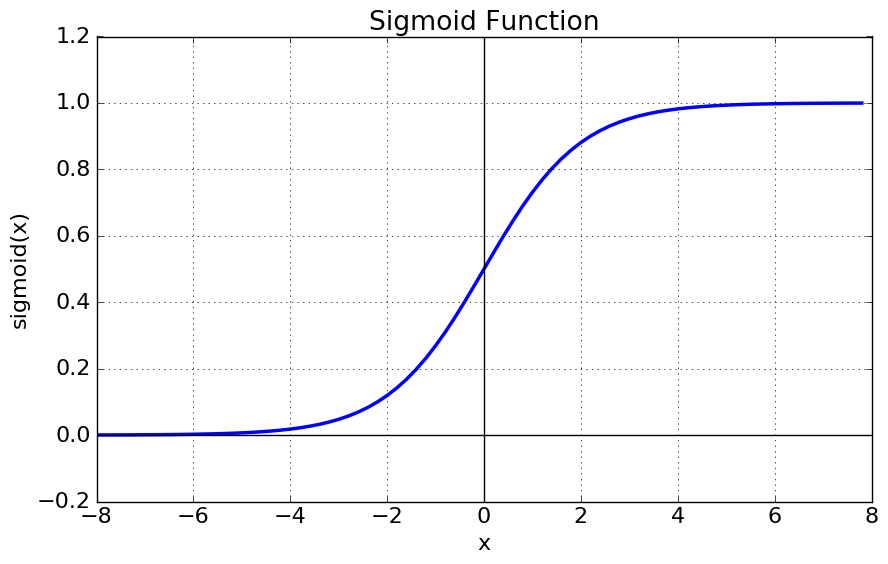


In [94]:
 from sklearn.linear_model import LogisticRegression

In [101]:
# 정확도로 모델을 평가하기 때문에 평균 제곱근 오차같은 매개변수를 따로 지정할 필요가 없다.

def cross_val(classifier, num_splits = 10):
    model = classifier
    scores = cross_val_score(model, x, y, cv = num_splits)
    print('정확도:', np.round(scores, 2))
    print('평균 정확도: %0.2f' % (scores.mean()))

In [102]:
cross_val(LogisticRegression())

정확도: [0.8  0.8  0.79 0.8  0.79 0.81 0.79 0.8  0.8  0.8 ]
평균 정확도: 0.80


In [103]:
from xgboost import XGBClassifier

- 이 분류기로 cross_val() 함수를 실행할 때 한가지 고려할 사항이 있다.
- 특성이 개수가 94개이고 num_splits의 기본값이 10이다. 
- XGBoost는 앙상블 모델이기 때문에 교차 검증반복마다 많은 모델을 만들어 연결한다.
- 따라서 n_extimators 매개변수를 5로 설정한다.
- 기본값 100을 사용하는 것만큼 안정적이지는 않지만 5개만으로도 충분하다.


In [107]:
cross_val(XGBClassifier(n_estimators = 100))

정확도: [0.87 0.87 0.87 0.86 0.87 0.87 0.87 0.87 0.88 0.87]
평균 정확도: 0.87


### 2장 결정 트리에서 xgboost 모델의 기본 학습기인 결정 트리를 만들고 성능을 높이기 위해 하이퍼파라미터를 미세튜닝하면서 머신러닝 기술을 향상시켜보겠다.